In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3107,ham,Hello hun how ru? Its here by the way. Im good...,NaN,NaN,NaN
3230,ham,No plm i will come da. On the way.,NaN,NaN,NaN
2703,ham,Yup no more already... Thanx 4 printing n hand...,NaN,NaN,NaN
2177,ham,Oh k :)why you got job then whats up?,NaN,NaN,NaN
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,NaN,NaN,NaN
3527,spam,You are a å£1000 winner or Guaranteed Caller P...,NaN,NaN,NaN
709,spam,4mths half price Orange line rental & latest c...,NaN,NaN,NaN
2506,ham,Who u talking about?,NaN,NaN,NaN
4804,ham,Sorry for the delay. Yes masters,NaN,NaN,NaN
921,ham,On ma way to school. Can you pls send me ashle...,NaN,NaN,NaN


In [65]:
data.shape

(5572, 5)

## Data Cleaning

In [66]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Converting to Number

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data['v1'])

In [69]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Duplicates values

In [70]:
data.duplicated().sum()

403

In [71]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

## EDA

In [72]:
import nltk

In [73]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [74]:
data['count_char'] =  data['v2'].apply(len)
data.head()

C:\Users\bharg\AppData\Local\Temp\ipykernel_12688\403103252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_char'] =  data['v2'].apply(len)


,v1,v2,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
data['count_words'] =  data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

C:\Users\bharg\AppData\Local\Temp\ipykernel_12688\2224990392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_words'] =  data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))


,v1,v2,count_char,count_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
data['count_sent'] =  data['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

C:\Users\bharg\AppData\Local\Temp\ipykernel_12688\3459300531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_sent'] =  data['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))


,v1,v2,count_char,count_words,count_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
data[data['v1'] == 0][['count_char','count_words', 'count_sent']].describe()

,count_char,count_words,count_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
data[data['v1'] == 1][['count_char','count_words', 'count_sent']].describe()

,count_char,count_words,count_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


c:\Users\bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


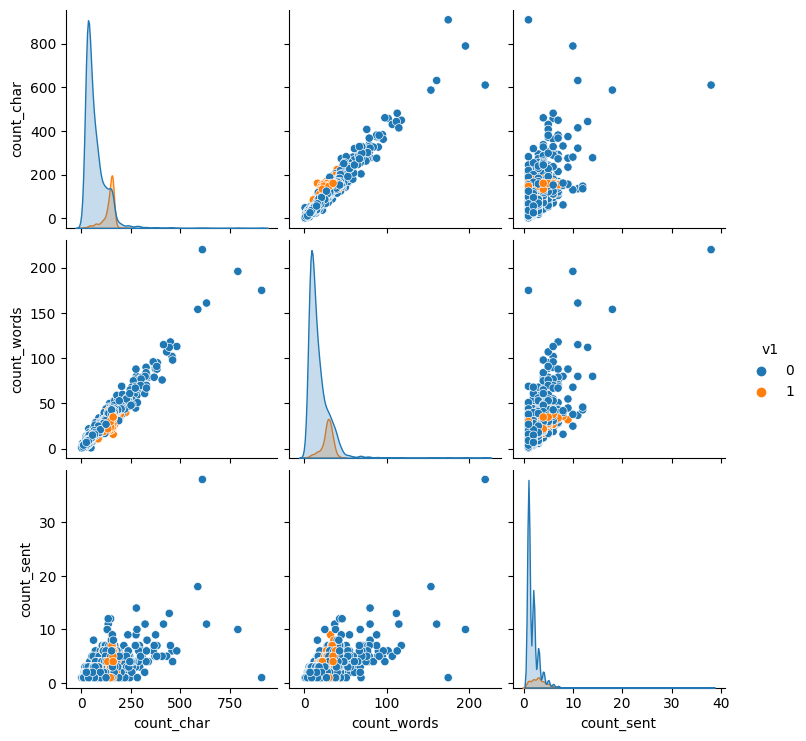

In [79]:
import seaborn as sns
sns.pairplot(data, hue="v1")

<Axes: >

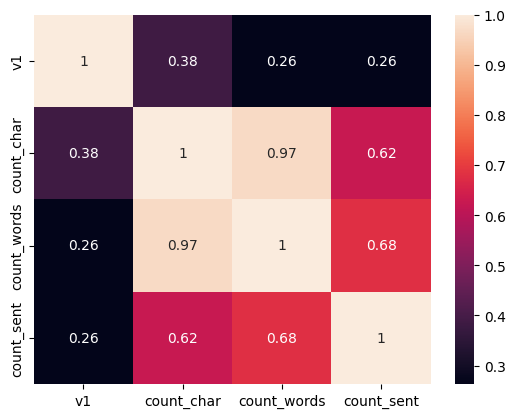

In [80]:
sns.heatmap(data.corr(numeric_only = True), annot=True)

## data Preprocessing

In [81]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [82]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [83]:
data['transformed_text']  = data['v2'].apply(transform_text)
data.head()


C:\Users\bharg\AppData\Local\Temp\ipykernel_12688\2217853122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']  = data['v2'].apply(transform_text)


,v1,v2,count_char,count_words,count_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [84]:
from wordcloud import WordCloud

In [85]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(data[data['v1'] == 1]['transformed_text'].str.cat(sep=" "))

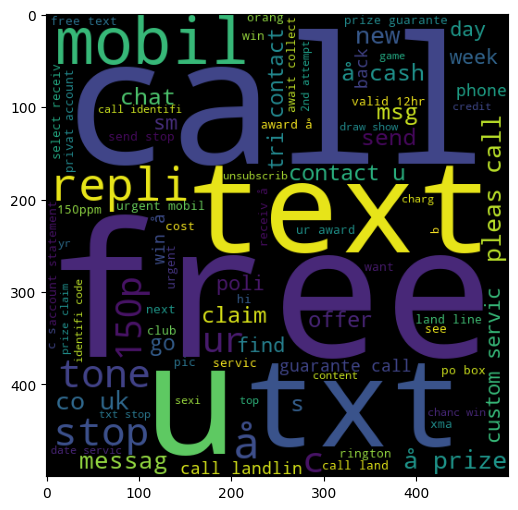

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

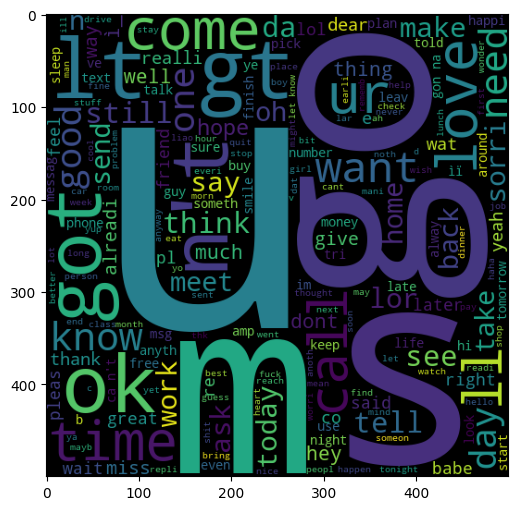

In [87]:
ham_wc = wc.generate(data[data['v1'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [88]:
spam_corpus = []
for m in data[data['v1'] == 1]['transformed_text'].tolist():
    for w in m.split():
        spam_corpus.append(w)
        
len(spam_corpus)

11083

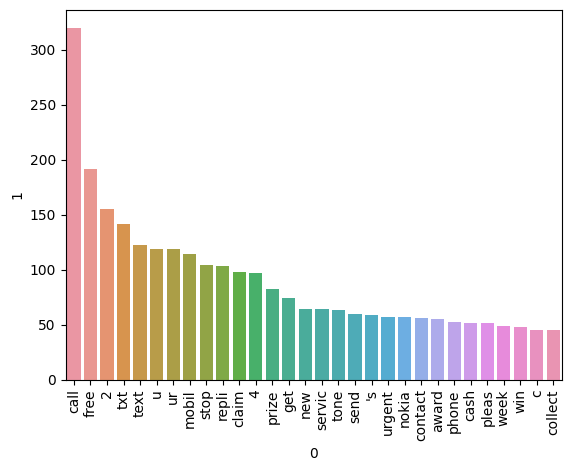

In [89]:
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [90]:
ham_corpus = []
for m in data[data['v1'] == 0]['transformed_text'].tolist():
    for w in m.split():
        ham_corpus.append(w)
        
len(ham_corpus)

39894

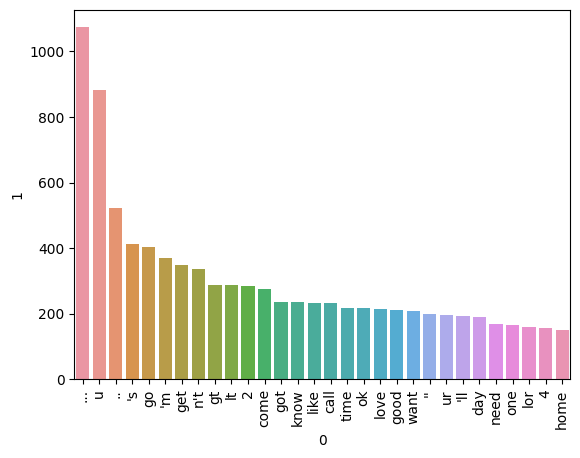

In [91]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

## Algorithm Testing

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [93]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [94]:
X.shape

(5169, 7377)

In [95]:
y = data['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Gaussian Naive Bayes

In [100]:
gnb.fit(x_train, y_train)
pred1 = gnb.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(y_test, pred1)

0.8733075435203095

In [102]:
print(precision_score(y_test, pred1))

0.5304347826086957


## Multinomial Naive Bayes

In [103]:
mnb.fit(x_train, y_train)
pred2 = mnb.predict(x_test)

In [104]:
accuracy_score(y_test, pred2)

0.9661508704061895

In [105]:
print(precision_score(y_test, pred2))

1.0


## Bernouli Naive Bayes

In [106]:
bnb.fit(x_train, y_train)
pred3 = bnb.predict(x_test)

In [107]:
accuracy_score(y_test, pred3)

0.9709864603481625

In [108]:
print(precision_score(y_test, pred3))

0.967479674796748


# Choosing naive bayes

### Accuracy Score 96.6% and Precision Score 100%

In [109]:
import joblib

joblib.dump(tfidf, 'vectorizer.joblib')

# Save the model
joblib.dump(mnb, 'model.joblib')

# Load the vectorizer
vectorizer = joblib.load('vectorizer.joblib')

# Load the model
model = joblib.load('model.joblib')

In [114]:
input_text = "Congratulations! You've won a free cruise. Call now to claim your prize!"   #spam
preprocessed_text = transform_text(input_text)
vectorized_text = vectorizer.transform([preprocessed_text]).toarray()

In [115]:
prediction = model.predict(vectorized_text)

In [116]:
if prediction == 0:
    print("The message is ham (not spam).")
else:
    print("The message is spam.")

The message is spam.


In [117]:
input_text = "Reminder: Our meeting is scheduled for tomorrow."            #Not Spam

preprocessed_text = transform_text(input_text)
vectorized_text = vectorizer.transform([preprocessed_text]).toarray()

prediction = model.predict(vectorized_text)

if prediction == 0:
    print("The message is ham (not spam).")
else:
    print("The message is spam.")

The message is ham (not spam).
